In [17]:
import pandas as pd
import numpy as np
import scipy as sp
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import f1_score, brier_score_loss, accuracy_score, confusion_matrix, precision_score,\
    recall_score

In [19]:
from loadcreon import LoadCreon
from creonmetrics import pu_scorer, prior_squared_error_scorer_015, \
    brier_score_labeled_loss_scorer, f1_assumed_scorer, f1_labeled_scorer, labeled_metric, assumed_metric
from semisuperhelper import SemiSupervisedHelper
from pnuwrapper import PNUWrapper

In [20]:
rs = joblib.load('res\\20170110random_rf_searcher.pkl')

In [21]:
rs_df = pd.DataFrame(rs.cv_results_)

In [22]:
rs_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_base_estimator__class_weight,param_base_estimator__max_depth,param_base_estimator__max_features,param_base_estimator__min_samples_leaf,param_base_estimator__min_samples_split,param_base_estimator__n_estimators,param_num_unlabeled,param_threshold_set_pct,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,10.43060,1.72536,1.000000,1.000000,balanced,18,50,7,0.745432,309,3120,0.0143,"{'base_estimator__max_features': 50, 'base_est...",32,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.893187,0.370427,0.000000,0.000000
1,4.93896,0.42432,6.327595,6.315817,balanced,15,None,6,0.538978,39,6823,None,"{'base_estimator__max_features': None, 'base_e...",9,6.155922,6.355594,7.361215,6.064216,5.577640,6.505330,6.462653,6.279254,6.080528,6.374690,0.616198,0.018193,0.589842,0.145329
2,5.36952,1.60056,2.725362,2.706781,balanced_subsample,49,10,4,0.452877,174,11048,None,"{'base_estimator__max_features': 10, 'base_est...",27,2.558601,2.879725,2.697741,2.286629,2.335073,2.597287,3.088967,2.794701,2.946434,2.975565,1.145104,0.250690,0.269064,0.244296
3,19.74648,2.86104,4.525160,4.690038,balanced,10,20,6,0.503342,397,6828,0.0143,"{'base_estimator__max_features': 20, 'base_est...",15,4.720602,4.990864,4.859129,4.765906,3.871185,4.407367,5.428757,4.614301,3.746107,4.671753,3.204065,0.072233,0.632584,0.190906
4,51.38628,8.88888,4.269216,4.542160,balanced,15,log2,1,0.283729,864,13583,0.0143,"{'base_estimator__max_features': 'log2', 'base...",17,3.982755,4.678087,4.784489,4.511749,3.324885,4.450787,4.961286,4.343297,4.292663,4.726878,1.877084,0.155187,0.586317,0.142420
5,10.39896,4.97640,2.684683,2.777058,balanced_subsample,19,5,5,0.300018,474,13632,None,"{'base_estimator__max_features': 5, 'base_esti...",29,2.477568,2.800504,2.831892,2.680288,2.575962,2.812961,2.890342,2.821212,2.647652,2.770322,0.788601,0.124018,0.154955,0.051377
6,5.00760,2.24972,3.020448,3.048298,balanced_subsample,22,sqrt,5,0.544945,299,4882,None,"{'base_estimator__max_features': 'sqrt', 'base...",25,2.271458,2.702620,3.538271,3.081341,2.585931,2.931993,3.527969,3.226125,3.178616,3.299410,0.750164,0.186192,0.510007,0.213912
7,4.16832,1.12008,NaN,NaN,None,4,20,8,0.850891,202,11930,None,"{'base_estimator__max_features': 20, 'base_est...",48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931381,0.031818,NaN,NaN
8,7.68768,3.61920,NaN,NaN,balanced_subsample,27,log2,3,0.776552,803,10658,None,"{'base_estimator__max_features': 'log2', 'base...",47,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.410205,0.055812,NaN,NaN
9,22.18944,12.23996,5.998468,8.511519,balanced_subsample,12,5,3,0.00424169,798,13053,None,"{'base_estimator__max_features': 5, 'base_esti...",11,5.744806,8.605387,6.722567,8.395585,5.279051,8.627789,6.550820,8.589567,5.695086,8.339270,0.620292,0.580547,0.548336,0.119609


In [61]:
rs_df[rs_df.param_threshold_set_pct.isnull()].mean_test_score

1     6.327595
2     2.725362
5     2.684683
6     3.020448
7          NaN
8          NaN
9     5.998468
10         NaN
11    3.784479
12         NaN
13         NaN
14    4.224970
16    3.233049
17    8.584509
18    2.402677
20    8.565738
21         NaN
24         NaN
26         NaN
27    0.227544
29    3.406108
33         NaN
34    3.769213
36    8.099791
38    4.622910
40    2.922280
43         NaN
44         NaN
46    1.000000
49    2.355635
Name: mean_test_score, dtype: float64

In [4]:
path = "C:\Data\\010317\membership14_final_0103.txt"
lc = LoadCreon(path)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(lc.X, lc.y, test_size=0.2, random_state=771, stratify=lc.y)

In [10]:
rs_df.params.iloc[17]

{'base_estimator__class_weight': 'balanced_subsample',
 'base_estimator__max_depth': 23,
 'base_estimator__max_features': None,
 'base_estimator__min_samples_leaf': 4,
 'base_estimator__min_samples_split': 0.18761334000444152,
 'base_estimator__n_estimators': 496,
 'num_unlabeled': 8057,
 'threshold_set_pct': None}

In [8]:
rf = RandomForestClassifier()
pnu = PNUWrapper(base_estimator=rf, num_unlabeled=5819, threshold_set_pct=0.0143, random_state=77)

In [12]:
pnu.set_params(**rs_df.params.iloc[17])

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=23, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=0.18761334000444152,
            min_weight_fraction_leaf=0.0, n_estimators=496, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=8057, random_state=77, threshold_set_pct=None)

In [13]:
pnu.fit(X_train.values, y_train.values)

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=23, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=0.18761334000444152,
            min_weight_fraction_leaf=0.0, n_estimators=496, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=8057, random_state=77, threshold_set_pct=None)

In [14]:
y_prob = pnu.predict_proba(X_test.values)
y_pred = pnu.predict(X_test.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEB1D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE5ED30>]], dtype=object)

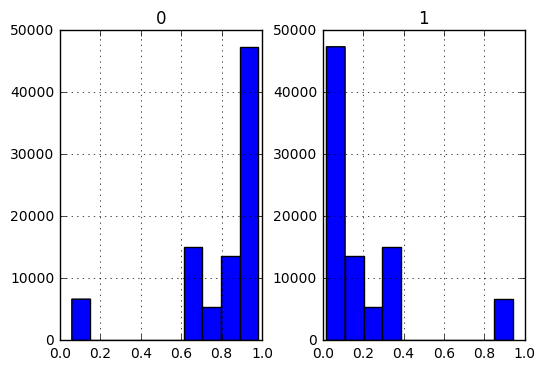

In [16]:
pd.DataFrame(y_prob).hist()

In [17]:
labeled_metric(y_test.values, y_prob, brier_score_loss)

0.13320342260066118

In [18]:
assumed_metric(y_test.values, y_prob, brier_score_loss)

0.089703572051049146

In [19]:
labeled_metric(y_test.values, y_pred, f1_score)

0.85750315258511978

In [20]:
assumed_metric(y_test.values, y_pred, f1_score)

0.095990965556182944

In [25]:
np.bincount(y_pred)[1] / len(y_pred)

0.075629680054458817

In [26]:
assumed_metric(y_test.values, y_pred, confusion_matrix)

array([[81396,  6326],
       [   78,   340]])

In [27]:
labeled_metric(y_test.values, y_pred, confusion_matrix)

array([[180,  35],
       [ 78, 340]])

In [28]:
from sklearn.metrics import fbeta_score

In [32]:
assumed_metric(y_test.values, y_pred, fbeta_score, beta=60)

0.8100347609539349

In [33]:
from creonmetrics import make_assumed_scorer

In [34]:
fbeta60 = make_assumed_scorer(fbeta_score, beta=60)

In [35]:
fbeta60(pnu, X_test.values, y_test.values)

0.8100347609539349

In [38]:
fbeta_score.__name__

'fbeta_score'

In [47]:
from creonmetrics import report_metrics

In [48]:
report_metrics(pnu, X_test.values, y_test.values)

assumed_brier       0.089704
assumed_f1          0.095991
assumed_f1beta10    0.708538
assumed_f1beta60    0.810035
labeled_acc         0.821485
labeled_avg_prec    0.921643
labeled_brier       0.133203
labeled_f1          0.857503
labeled_prec        0.906667
labeled_recall      0.813397
labeled_roc_auc     0.825303
pr_one_unlabeled    0.071891
pu_score            8.748085
dtype: float64

In [9]:
pnu.set_params(**rs_df.params.iloc[20])

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=3, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=100, min_samples_split=0.03737708549699359,
            min_weight_fraction_leaf=0.0, n_estimators=623, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=14213, random_state=77, threshold_set_pct=None)

In [63]:
pnu.fit(X_train.values, y_train.values)

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=3, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=100, min_samples_split=0.03737708549699359,
            min_weight_fraction_leaf=0.0, n_estimators=623, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=14213, random_state=77, threshold_set_pct=None)

In [64]:
report_metrics(pnu, X_test.values, y_test.values)

assumed_brier       0.085076
assumed_f1          0.096005
assumed_f1beta10    0.708553
assumed_f1beta60    0.810035
labeled_acc         0.821485
labeled_avg_prec    0.921643
labeled_brier       0.135563
labeled_f1          0.857503
labeled_prec        0.906667
labeled_recall      0.813397
labeled_roc_auc     0.825303
pr_one_unlabeled    0.071880
pu_score            8.749398
dtype: float64

In [71]:
pd.DataFrame(pnu.base_estimator.feature_importances_, index=X_test.columns).sort_values(by=0, ascending=False)

,0
DIAG_FLAG4_Sum,0.652172
DIAG_FLAG5_Sum,0.299476
ndc_cat58_Sum,0.040698
CPT_FLAG18_Sum,0.002328
CPT_FLAG12_Sum,0.002055
DIAG_FLAG6_Sum,0.001196
ndc_cat87_Sum,0.000674
REVCODE_FLAG15_Sum,0.000600
ndc_cat45_Sum,0.000293
age,0.000201


In [10]:
from sklearn.model_selection import learning_curve

In [11]:
train_sizes, train_scores, test_scores = learning_curve(pnu, X_train.values, 
                                                        y_train.values, train_sizes=np.asarray([0.05, 0.1, 0.2, 0.5, 1]),
                                                        n_jobs=-1, verbose=10, scoring=pu_scorer)

[learning_curve] Training set sizes: [ 11751  23503  47007 117518 235036]


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.9min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.3min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.5min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.7min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.8min finished


In [12]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [13]:
import matplotlib.pyplot as plt

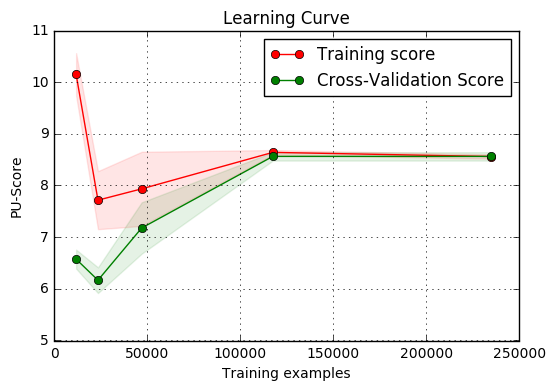

In [16]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("PU-Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")